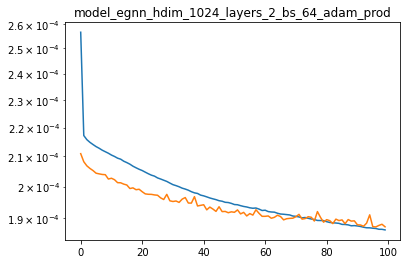

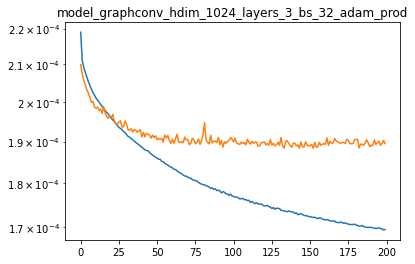

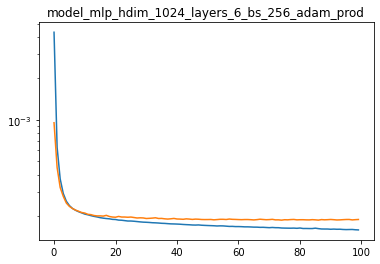

In [4]:
from matplotlib import pyplot as plt
import os
import glob
import pandas as pd

best_test = []

plot = True
for dr in sorted(glob.glob('runs/model_*prod')):
    dr = dr.replace('runs/', '')
    lcfname = f'runs/{dr}/learning_curves.tsv'
    if os.path.exists(lcfname):
        lcurves = pd.read_csv(lcfname)
        best_test.append([dr, lcurves['test'][40:].min()])
        if plot:
            plt.figure()
            plt.plot(lcurves['train'], label='train')
            plt.plot(lcurves['test'], label='test')
            plt.yscale('log')
            plt.title(dr)
best_test = pd.DataFrame(best_test, columns=['setup', 'test_error'])

In [6]:
best_test.sort_values('test_error')

,setup,test_error
2,model_mlp_hdim_1024_layers_6_bs_256_adam_prod,0.000187
0,model_egnn_hdim_1024_layers_2_bs_64_adam_prod,0.000187
1,model_graphconv_hdim_1024_layers_3_bs_32_adam_...,0.000188
